# EDA BASELINE

This notebook will be a baseline for EDA for my next competitions with tabular data. \
I will also make similar baseline for Text and Image data.

## IMPORTS

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas_profiling import ProfileReport
import gc
import json
import math
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os

## CONFIG

In [2]:
config = {
    "TRAIN_PATH" : "D:/Documents/GitHub/ml-pipeline/data/TPS-APR2021/train.csv",
    "TEST_PATH" : "D:/Documents/GitHub/ml-pipeline/data/TPS-APR2021/test.csv",
    "TARGET_VAR" : "Survived"
}

## LOADING DATA

In [3]:
df_train = pd.read_csv(config["TRAIN_PATH"])
df_test = pd.read_csv(config["TEST_PATH"])

### TRAIN AND TEST SET OVERVIEW

Check dataset size, test set size, number of null values etc...

In [4]:
df_train.head()

PassengerId  Survived  Pclass              Name   Sex    Age  SibSp  Parch  \
0            0         1       1  Oconnor, Frankie  male    NaN      2      0   
1            1         0       3       Bryan, Drew  male    NaN      0      0   
2            2         0       3    Owens, Kenneth  male   0.33      1      2   
3            3         0       3     Kramer, James  male  19.00      0      0   
4            4         1       3     Bond, Michael  male  25.00      0      0   

      Ticket   Fare   Cabin Embarked  
0     209245  27.14  C12239        S  
1      27323  13.35     NaN        S  
2  CA 457703  71.29     NaN        S  
3   A. 10866  13.04     NaN        S  
4     427635   7.76     NaN        S

In [5]:
df_test.head()

PassengerId  Pclass              Name     Sex   Age  SibSp  Parch  Ticket  \
0       100000       3  Holliday, Daniel    male  19.0      0      0   24745   
1       100001       3  Nguyen, Lorraine  female  53.0      0      0   13264   
2       100002       1   Harris, Heather  female  19.0      0      0   25990   
3       100003       2      Larsen, Eric    male  25.0      0      0  314011   
4       100004       1     Cleary, Sarah  female  17.0      0      2   26203   

    Fare   Cabin Embarked  
0  63.01     NaN        S  
1   5.81     NaN        S  
2  38.91  B15315        C  
3  12.93     NaN        S  
4  26.89  B22515        C

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Pclass       100000 non-null  int64  
 2   Name         100000 non-null  object 
 3   Sex          100000 non-null  object 
 4   Age          96513 non-null   float64
 5   SibSp        100000 non-null  int64  
 6   Parch        100000 non-null  int64  
 7   Ticket       94819 non-null   object 
 8   Fare         99867 non-null   float64
 9   Cabin        29169 non-null   object 
 10  Embarked     99723 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.4+ MB


Describe give you an overview of your continuous variables, check the different distributions, do they differ in the test set ?

In [8]:
df_train.describe()

PassengerId       Survived         Pclass           Age  \
count  100000.000000  100000.000000  100000.000000  96708.000000   
mean    49999.500000       0.427740       2.106910     38.355472   
std     28867.657797       0.494753       0.837727     18.313556   
min         0.000000       0.000000       1.000000      0.080000   
25%     24999.750000       0.000000       1.000000     25.000000   
50%     49999.500000       0.000000       2.000000     39.000000   
75%     74999.250000       1.000000       3.000000     53.000000   
max     99999.000000       1.000000       3.000000     87.000000   

               SibSp          Parch         Fare  
count  100000.000000  100000.000000  99866.00000  
mean        0.397690       0.454560     43.92933  
std         0.862566       0.950076     69.58882  
min         0.000000       0.000000      0.68000  
25%         0.000000       0.000000     10.04000  
50%         0.000000       0.000000     24.46000  
75%         1.000000       1.000000     33.50000  
max         8.000000       9.000000    744.66000

In [9]:
df_test.describe()

PassengerId         Pclass           Age          SibSp  \
count  100000.000000  100000.000000  96513.000000  100000.000000   
mean   149999.500000       2.368930     30.565796       0.486550   
std     28867.657797       0.878458     14.054634       0.771262   
min    100000.000000       1.000000      0.080000       0.000000   
25%    124999.750000       1.000000     21.000000       0.000000   
50%    149999.500000       3.000000     27.000000       0.000000   
75%    174999.250000       3.000000     40.000000       1.000000   
max    199999.000000       3.000000     81.000000       8.000000   

              Parch          Fare  
count  100000.00000  99867.000000  
mean        0.49283     45.374804  
std         0.92360     65.204725  
min         0.00000      0.050000  
25%         0.00000     10.130000  
50%         0.00000     13.980000  
75%         1.00000     37.390000  
max         9.00000    680.700000

### TARGET VARIABLE

Let's take a look at the target variable

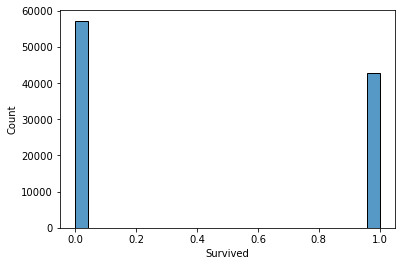

In [10]:
ax = sns.histplot(x=config["TARGET_VAR"], data=df_train)

### MISSING VALUES

In [11]:
def missing_zero_values_table(df): #Function to access missing and zero values in your dataset
        zero_val = (df == 0.00).astype(int).sum(axis=0) #Number of zeros in the dataset
        mis_val = df.isnull().sum() #Number of missing values in the dataset
        mis_val_percent = 100 * df.isnull().sum() / len(df) #percent missing values
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'}) #Create missing value table
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [12]:
missing_zero_values_table(df_train)

Your selected dataframe has 12 columns and 100000 Rows.
There are 5 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
Cabin               0           67866               67.9   
Ticket              0            4623                4.6   
Age                 0            3292                3.3   
Embarked            0             250                0.2   
Fare                0             134                0.1   

          Total Zero Missing Values  % Total Zero Missing Values Data Type  
Cabin                         67866                         67.9    object  
Ticket                         4623                          4.6    object  
Age                            3292                          3.3   float64  
Embarked                        250                          0.2    object  
Fare                            134                          0.1   float64

In [13]:
missing_zero_values_table(df_test)

Your selected dataframe has 11 columns and 100000 Rows.
There are 5 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
Cabin               0           70831               70.8   
Ticket              0            5181                5.2   
Age                 0            3487                3.5   
Embarked            0             277                0.3   
Fare                0             133                0.1   

          Total Zero Missing Values  % Total Zero Missing Values Data Type  
Cabin                         70831                         70.8    object  
Ticket                         5181                          5.2    object  
Age                            3487                          3.5   float64  
Embarked                        277                          0.3    object  
Fare                            133                          0.1   float64

### PANDAS PROFILING

We use pandas profiling to rapidly get many useful information about our dataset and it's features.

In [14]:
profile_train = ProfileReport(df_train, title='Pandas Train Profiling Report', html={'style':{'full_width':True}})

In [15]:
profile_train

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.46s/it]


In [16]:
profile_test = ProfileReport(df_test, title='Pandas Train Profiling Report', html={'style':{'full_width':True}})

In [17]:
profile_test

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]
